In [40]:
!pip install matplotlib


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
#자연어처리
!pip install nltk


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import  Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
#구글 mapreduce 크롤링 공부 하는 것을 추천


In [44]:
#### NLTK 리소스를 최초 한번 다운로드

In [45]:
import nltk

In [46]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [47]:
#파일병합
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [48]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,NaN,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
95,NaN,96,Availability modelling and assurance for a big...,"Ke, Zuqiang; Park, Nohpill",Inderscience,2019
96,NaN,97,Big Earth Data: a comprehensive analysis of vi...,"Merritt, Patrick; Bi, Haixia; Davis, Bradley; ...",John Wiley & Sons Ltd,2018
97,NaN,98,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
98,NaN,99,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017


In [49]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,NaN,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
495,NaN,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
496,NaN,97,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
497,NaN,98,New discrimination diagrams for basalts based ...,"Zhang, Qi; Sun, Weidong; Zhao, Yong; Yuan, Fan...",John Wiley & Sons Ltd,2019
498,NaN,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [50]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0]],axis='columns')
all_data_concat

,번호,제목,저자,출판사,출판일
0,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...
495,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
496,97,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
497,98,New discrimination diagrams for basalts based ...,"Zhang, Qi; Sun, Weidong; Zhao, Yong; Yuan, Fan...",John Wiley & Sons Ltd,2019
498,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [51]:
all_data_concat.to_csv('./data/riss_bigdata.csv', index=False, encoding='utf-8')

#### 데이터전처리

In [52]:
all_title = all_data_concat['제목']
all_title

0      Call for Special Issue Papers: Big Data Analyt...
1      Call for Papers: Special Issue on Big Data in ...
2      An Exercise in Exploring Big Data for Producin...
3      Big Data in Healthcare: Opportunities and Chal...
4      Internet of Things-Based Optimized Routing and...
                             ...                        
495    Comparative study of big data of global adakit...
496    Furthest-Pair-Based Binary Search Tree for Spe...
497    New discrimination diagrams for basalts based ...
498                 Big Data 2.0: Cataclysm or Catalyst?
499                                 Big Data on Robotics
Name: 제목, Length: 500, dtype: object

In [53]:
#여러가지 부사나 동사 등 불필요한 것을 제거
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [54]:
lemma = WordNetLemmatizer()

In [55]:
words = []
#명사(keyword)만 남기기
for title in all_title:
    EnWords  = re.sub(r'[^a-zA-Z]+',' ',str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [56]:
print(words) # 결과 값이 2차원리스트 형태 ex) list = [[]]

[['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity'], ['call', 'paper', 'special', 'issue', 'big', 'data', 'robotics'], ['exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information'], ['big', 'data', 'healthcare', 'opportunity', 'challenge'], ['internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection'], ['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence'], ['call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data'], ['research', 'dilemma', 'behavioral', 'big', 'data'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data

In [57]:
words_reduce = list(reduce(lambda x, y: x+y, words))#차원축소 2차원 -> 1차원
print(words_reduce)

['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence', 'call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'research', 'dilemma', 'behavioral', 'big', 'data', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'

In [58]:
count = Counter(words_reduce) #count클래스 각각의 갯수를 표시

count

Counter({'call': 30,
         'special': 31,
         'issue': 35,
         'paper': 28,
         'big': 528,
         'data': 576,
         'analytics': 89,
         'intelligent': 10,
         'system': 33,
         'cybersecurity': 1,
         'robotics': 3,
         'exercise': 1,
         'exploring': 4,
         'producing': 1,
         'reliable': 1,
         'statistical': 4,
         'information': 6,
         'healthcare': 8,
         'opportunity': 7,
         'challenge': 13,
         'internet': 11,
         'thing': 9,
         'based': 46,
         'optimized': 2,
         'routing': 1,
         'gathering': 1,
         'landslide': 1,
         'detection': 8,
         'scientific': 7,
         'machine': 19,
         'learning': 30,
         'science': 18,
         'engineering': 12,
         'ensemble': 3,
         'scalable': 17,
         'approach': 39,
         'intrusion': 1,
         'using': 30,
         'framework': 28,
         'industrial': 2,
         'intell

In [61]:
word_count = dict()

for tag, counts in count.most_common(10):
    if len(str(tag))>1:
        word_count[tag] = counts
        print('%s : %d' % (tag, counts))

data : 576
big : 528
analytics : 89
based : 46
analysis : 40
approach : 39
issue : 35
system : 33
special : 31
call : 30


In [ ]:
#### 단어개수 차트

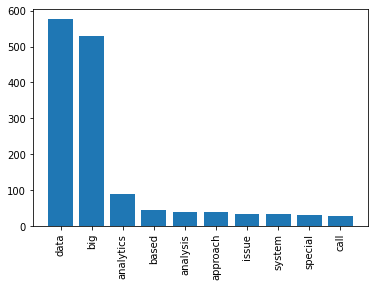

In [63]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)
plt.show()

In [65]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2004,2
1,2011,2
2,2012,11
3,2013,12
4,2014,43
5,2015,40
6,2016,76
7,2017,69
8,2018,64
9,2019,42


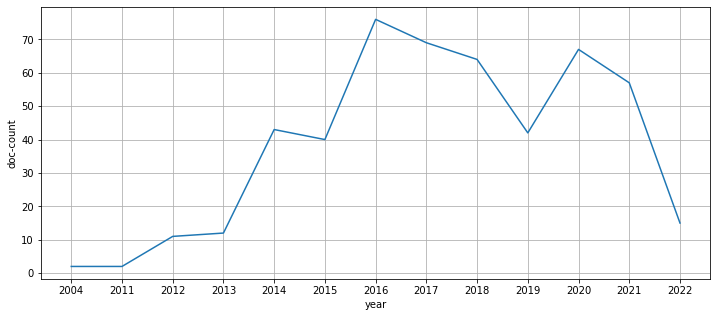

In [72]:
plt.figure(figsize=(12, 5))
plt.xlabel('year')
plt.ylabel('doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)),[text for text in summary_year['출판일']])
plt.show()

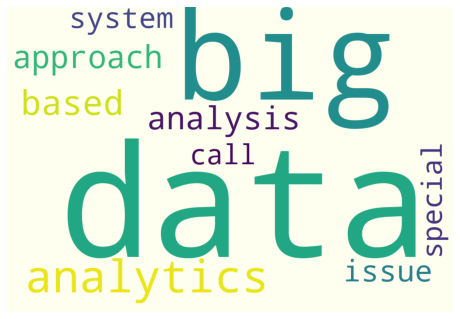

In [74]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color= 'ivory', stopwords = stopwords, width = 1024, height=700)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [75]:
cloud.to_file('./data/riss_bigdata_wordCloud.jpg')